In [ ]:
#!python -m spacy download en_core_web_sm

In [ ]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx
import re
from pyvis.network import Network
import matplotlib.pyplot as plt

In [ ]:
#loading spacy English Language model
NER = spacy.load("en_core_web_sm")

In [ ]:
#Load books

import os

all_books = [b for b in os.scandir("data") if ".txt" in b.name]

all_books

[<DirEntry '1 The Last Wish.txt'>,
 <DirEntry '2 The Sword of Destiny.txt'>,
 <DirEntry '3 Blood of Elves.txt'>,
 <DirEntry '4 Times of Contempt.txt'>,
 <DirEntry '5 Baptism of Fire.txt'>,
 <DirEntry '6 The Tower of the Swallow.txt'>,
 <DirEntry '7 The Lady of the Lake.txt'>,
 <DirEntry '8 something ends something begins.txt'>]

In [197]:
book = all_books[1]
book_text = open(book).read()
book_doc = NER(book_text)

displacy.render(book_doc[0:2000], style = "ent", jupyter=True)


In [198]:
character_df = pd.read_csv("characters.csv")
character_df.head(20)

,book,character
0,Category:Baptism of Fire characters,Adalia
1,Category:Baptism of Fire characters,Adela
2,Category:Baptism of Fire characters,Aen Saevherne
3,Category:Baptism of Fire characters,Aevenien
4,Category:Baptism of Fire characters,Aglaïs
5,Category:Baptism of Fire characters,Albrich
6,Category:Baptism of Fire characters,Amavet
7,Category:Baptism of Fire characters,Angus Bri Cri
8,Category:Baptism of Fire characters,Anna Kameny
9,Category:Baptism of Fire characters,Anzelm Aubry


In [199]:
# Removendo os colchetes e o texto entre estes, geralmente alcunhas
character_df['character'] = character_df['character'].apply(lambda x: re.sub("[\(].*[/)]", "", x))
#criando uma nova coluna com os primeiros nomes de cada personagem
character_df['character_firstname'] = character_df['character'].apply(lambda x: x.split(' ',1)[0])
pd.set_option('display.max_rows', None)
character_df.head(20)

,book,character,character_firstname
0,Category:Baptism of Fire characters,Adalia,Adalia
1,Category:Baptism of Fire characters,Adela,Adela
2,Category:Baptism of Fire characters,Aen Saevherne,Aen
3,Category:Baptism of Fire characters,Aevenien,Aevenien
4,Category:Baptism of Fire characters,Aglaïs,Aglaïs
5,Category:Baptism of Fire characters,Albrich,Albrich
6,Category:Baptism of Fire characters,Amavet,Amavet
7,Category:Baptism of Fire characters,Angus Bri Cri,Angus
8,Category:Baptism of Fire characters,Anna Kameny,Anna
9,Category:Baptism of Fire characters,Anzelm Aubry,Anzelm


In [200]:
sent_entity_df=[]
#parte lógica, separando os nomes por sentença
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({'sentence': sent, 'entities': entity_list})

sent_entity_df = pd.DataFrame(sent_entity_df)
sent_entity_df.head()

KeyboardInterrupt: 

In [ ]:
# filtrando o que não é personagem
def filter_entity(ent_list, character_df):
    return [ent for ent in ent_list
           if ent in list(character_df.character)
           or ent in list(character_df.character_firstname)]


In [ ]:
filter_entity(['Geralt', 'Thu','2'], character_df)

['Geralt']

In [ ]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

# Filtrando as sentenças sem personagens

sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len)>0]
sent_entity_df_filtered.head(10)

,sentence,entities,character_entities
85,"(I, am, Geralt, of, Rivia, .)",[Geralt of Rivia],[Geralt of Rivia]
95,"(Is, there, anything, keeping, you, in, this, ...",[Geralt of Rivia],[Geralt of Rivia]
102,"("", \n, "", Borch, ,, "", replied, Geralt, ,, wh...","[Borch, Geralt]",[Geralt]
106,"("", \n, "", There, are, some, ,, "", Geralt, rep...",[Geralt],[Geralt]
110,"("", \n, Geralt, took, off, a, glove, and, shoo...",[Geralt],[Geralt]
140,"("", I, forgot, ,, "", Three, Jackdaws, winked, ...","[Three Jackdaws, Geralt]",[Geralt]
151,"(Geralt, loosened, his, belt, ,, removed, his,...",[Geralt],[Geralt]
157,"("", Do, the, girls, speak, the, common, langua...",[Geralt],[Geralt]
160,"(How, 's, your, soup, ,, Geralt, ?, "", \n, "", ...","[Geralt, Hmm]",[Geralt]
169,"(Yet, there, is, a, certain, principal, underl...",[Geralt],[Geralt]


In [ ]:
#pegar apenas o primeiro nome dos personagens
sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] for item in x])
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

C:\Users\77gab\AppData\Local\Temp\ipykernel_14556\1632386997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] for item in x])


,sentence,entities,character_entities
85,"(I, am, Geralt, of, Rivia, .)",[Geralt of Rivia],[Geralt]
95,"(Is, there, anything, keeping, you, in, this, ...",[Geralt of Rivia],[Geralt]
102,"("", \n, "", Borch, ,, "", replied, Geralt, ,, wh...","[Borch, Geralt]",[Geralt]
106,"("", \n, "", There, are, some, ,, "", Geralt, rep...",[Geralt],[Geralt]
110,"("", \n, Geralt, took, off, a, glove, and, shoo...",[Geralt],[Geralt]
...,...,...,...
11314,"(He, only, saw, black, -, gloved, hands, squee...",[Ciri],[Ciri]
11316,"(Oh, ,, Geralt, !)",[Geralt],[Geralt]
11321,"(Say, it, ,, Geralt, !)",[Geralt],[Geralt]
11322,"(Forever, !, Say, it, !, "", \n, "", Forever, ,,...","[Forever, Ciri, Geralt]","[Ciri, Geralt]"


Criando Relações


In [ ]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])
    
    # Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})



In [ ]:
relationship_df = pd.DataFrame(relationships)
pd.set_option('display.max_rows', None)


In [ ]:
relationship_df=pd.DataFrame(np.sort(relationship_df.values, axis=1), columns=relationship_df.columns)

In [ ]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(['source','target'], sort=False, as_index=False).sum()

In [ ]:
pd.set_option('display.max_rows', None)
relationship_df

,source,target,value
0,Geralt,Niedamir,52
1,Eyck,Geralt,51
2,Dorregaray,Geralt,30
3,Dorregaray,Yennefer,44
4,Geralt,Yarpen,24
5,Geralt,Gyllenstiern,32
6,Boholt,Niedamir,21
7,Boholt,Geralt,39
8,Geralt,Kennet,2
9,Boholt,Kennet,8


## GRAPH ANALISYS AND VISUALIZATION


In [ ]:
G = nx.from_pandas_edgelist(relationship_df,
                            source="source",
                            target="target",
                            edge_attr="value",
                            create_using= nx.Graph())

In [ ]:
#plt.figure(figsize=(10,10))
#pos = nx.kamada_kawai_layout(G)
#nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos=pos)
#plt.show()

In [ ]:
net = Network(notebook=True, width="1000px", height="700px", bgcolor="#222222", font_color='white')

node_degree = dict(G.degree)

nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show("witcher.html")

witcher.html


<Axes: >

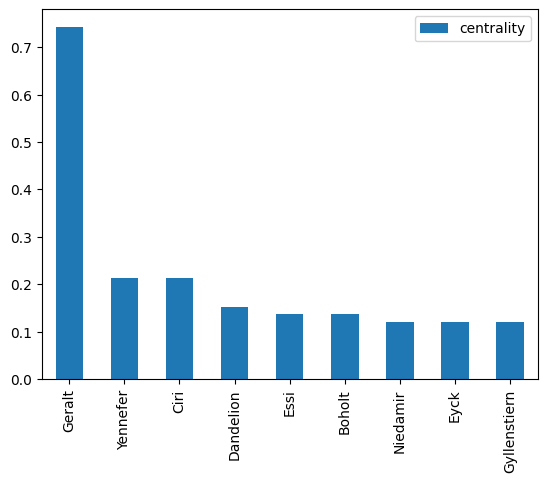

In [ ]:
#Degree Centrality Method
degree_dict = nx.degree_centrality(G)
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index',columns=['centrality'])
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

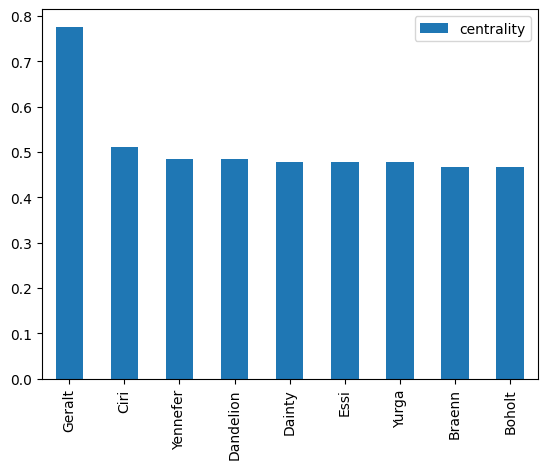

In [ ]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

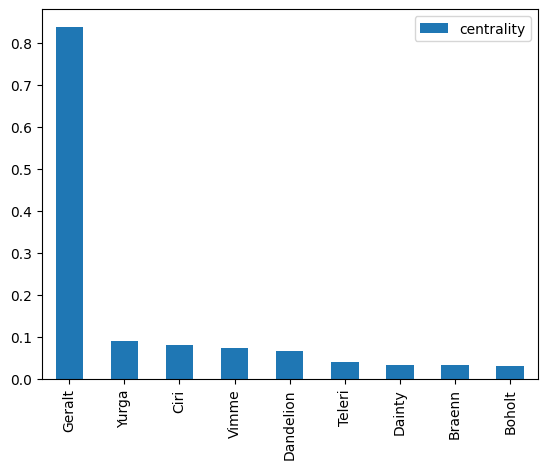

In [201]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [203]:
import community as community_louvain

communities = community_louvain.best_partition(G)

nx.set_node_attributes(G, communities, 'group')

{'Geralt': 3,
 'Niedamir': 1,
 'Eyck': 1,
 'Dorregaray': 1,
 'Yennefer': 1,
 'Yarpen': 1,
 'Gyllenstiern': 1,
 'Boholt': 1,
 'Kennet': 1,
 'Crinfrid': 1,
 'Villentretenmerth': 1,
 'Istredd': 3,
 'Herbolth': 3,
 'Ivo': 3,
 'Two': 5,
 'Dandelion': 4,
 'Pike': 4,
 'Dainty': 4,
 'Vespula': 4,
 'Vimme': 4,
 'Sulimir': 4,
 'Ther': 4,
 'Rhundurin': 4,
 'Dudu': 4,
 "Sh'eenaz": 2,
 'Agloval': 2,
 'Gaspard': 0,
 'Teleri': 0,
 'Dalia': 0,
 'Mestvin': 0,
 'Essi': 2,
 'Gerard': 4,
 'Zelest': 2,
 'Duke': 2,
 'Akeretta': 2,
 'Veverka': 2,
 'Ethain': 3,
 'Juan': 3,
 'Cynthia': 2,
 'Braenn': 3,
 'Ciri': 6,
 'Ervyll': 6,
 'Voymir': 3,
 'Kistrin': 6,
 'Alvina': 6,
 'Vesemir': 3,
 'Cirilla': 3,
 'Freixenet': 6,
 'Venzlav': 6,
 'Ekkehard': 6,
 'Viraxas': 6,
 'Morenn': 6,
 'Mona': 3,
 'Pavetta': 6,
 'Baron': 6,
 'Junghans': 6,
 'Brick': 6,
 'Levecque': 6,
 'Mousesack': 6,
 'Yurga': 5,
 'Visenna': 3,
 'Atlan': 5,
 'Lytta': 3,
 'Gorazd': 3,
 'Roach': 5,
 'Nadbor': 5,
 'Sulik': 5}

In [205]:
com_net = Network(notebook=True, width="1000px", height="700px", bgcolor="#222222", font_color='white')
com_net.from_nx(G)
com_net.show("witcher_communities.html")

witcher_communities.html
